# *Star Wars* Movies and Characters - Fans' Opinion
In this project, we will aim to understand what fans of the *Star Wars* trilogy think about different movies of the saga and how they perceive various characters.

We will:
- Find the most viewed and the most liked movie of the saga
- Segment the data into groups and see whether these groups perceive the movies differently
- Find out who is the most liked, the most disliked and the most controversial character of the *Star Wars* trilogy, according to its fans

### Summary of Results

After analyzing the data, we figured out that:
- The fifth episode was the most viewed **and** the most liked movie of the saga;
- Males tend to watch *Star Wars* more than females;
- Those who think that Han shot first liked the fourth episode more than those who believe that Greedo was the one to start the gunfire;
- Han Solo was the most liked character of the trilogy, while Jar Jar Binks turned out to be the most disliked and the most controversial character of the saga.

In [1]:
# Import the libraries and read in the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

star_wars = pd.read_csv('star_wars.csv', encoding = 'ISO-8859-1')

## Exploring and cleaning the data

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
# Remove rows where respondent ID is invalid

star_wars = star_wars.loc[star_wars['RespondentID'].notna(), :]
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,

In [5]:
# Explore the values in the second column

star_wars.iloc[:, 1].value_counts(dropna = False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
# Explore the values in the third column

star_wars.iloc[:, 2].value_counts(dropna = False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Next, we will convert the second and the third columns which contain only 'Yes', 'No' and `NaN` values to the Boolean type. 'Yes' would be `True`, 'No' would be `False`, and `NaN` will remain as they are. This will make our data easier to analyze.

In [7]:
# Create the mapping dictionary
yes_no = {'Yes': True, 'No': False}

# Apply it to the second and the third columns
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some col

Next, we will clean the following 6 columns so the information in them becomes more intuitive and easier to analyze. 

These columns represent a single checkbox question. Here is the clarification:

- Which of the following Star Wars films have you seen? Please select all that apply. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
- Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

We will change the values in these columns for `True` if the respondent had seen the movie, and for `False` if the respondent had seen the movie or did not answer the question.

In [8]:
# Create the mapping dictionary
checkbox_1 = {'Star Wars: Episode I  The Phantom Menace': True, 
             'Star Wars: Episode II  Attack of the Clones': True,
             'Star Wars: Episode III  Revenge of the Sith': True,
             'Star Wars: Episode IV  A New Hope': True,
             'Star Wars: Episode V The Empire Strikes Back': True,
             'Star Wars: Episode VI Return of the Jedi': True,
             np.nan: False
             }

# Apply the dictionary to each of the 6 columns
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(checkbox_1)

star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,True,True,True,True,True,True,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,True,True,True,True,True,True,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,False,True,False,False,False,False,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


Next, we will change the column names of these 6 columns. Since each column contains the answer to the question whether a respondent has seen one of the *Star Wars* episodes, we will rename them to `'seen_x'`, where 'x' would be the number of the episode.

In [9]:
# Construct the dictionary for renaming the columns

rename_6_cols = {}
for i in range(1, 7):
    rename_6_cols[star_wars.columns[i+2]] = 'seen_{}'.format(i)
    
rename_6_cols

{'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
 'Unnamed: 4': 'seen_2',
 'Unnamed: 5': 'seen_3',
 'Unnamed: 6': 'seen_4',
 'Unnamed: 7': 'seen_5',
 'Unnamed: 8': 'seen_6'}

In [10]:
# Rename these 6 columns

star_wars.rename(rename_6_cols, axis = 1, inplace = True)
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,True,True,True,True,True,True,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,True,True,True,True,True,True,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,False,True,False,False,False,False,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


The next 6 columns represent respondents' ranking of the *Star Wars* movies from 1 to 6 with 1 being their favourite movie and 6 being their least favourite movie.

For these columns, we will:
- convert the data in these columns to the float dtype;
- give each column a more intuitive and descriptive name.

In [12]:
# Change the columns' dtype
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)


# Construct the dictionary for renaming columns
rename_next_6_cols = {}

for i in range(1, 7):
    rename_next_6_cols[star_wars.columns[i+8]] = 'ranking_{}'.format(i)
    
rename_next_6_cols

{'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
 'Unnamed: 10': 'ranking_2',
 'Unnamed: 11': 'ranking_3',
 'Unnamed: 12': 'ranking_4',
 'Unnamed: 13': 'ranking_5',
 'Unnamed: 14': 'ranking_6'}

In [13]:
# Rename the columns

star_wars.rename(rename_next_6_cols, axis = 1, inplace = True)
star_wars.iloc[:10, 9:15]

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0
6,1.0,4.0,3.0,6.0,5.0,2.0
7,6.0,5.0,4.0,3.0,1.0,2.0
8,4.0,5.0,6.0,3.0,2.0,1.0
9,5.0,4.0,6.0,2.0,1.0,3.0
10,1.0,2.0,3.0,4.0,5.0,6.0


## The most viewed and the most liked *Star Wars* episode

Next, we will find the average rating of each episode to see which of them the respondents liked more.

A lower rating (closer to 1) means a higher-ranked movie and vice versa.

In [14]:
# Compute mean ranking for each episode

mean_ranks = star_wars.iloc[:, 9:15].mean(axis = 0)
mean_ranks

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

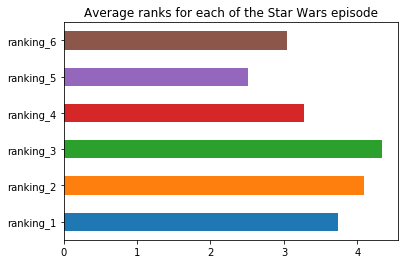

In [54]:
# Plot the mean ranking of each episode

mean_ranks.plot(kind = 'barh', title = 'Average ranks for each of the Star Wars episode')

As we can see from the graph, the 5th episode is the highest ranked episode. Moreover, episodes 4, 5 and 6 have higher ranks than episodes 1, 2, 3.

Next, we will find out how many respondents have seen each of the episodes.

In [16]:
# Compute the number of viewers of each episode

num_of_viewers = star_wars.iloc[:, 3:9].sum(axis = 0)
num_of_viewers

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

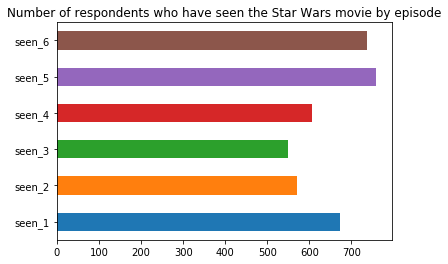

In [17]:
# Plot the number of viewers of each episode

num_of_viewers.plot(kind = 'barh', title = 'Number of respondents who have seen the Star Wars movie by episode')

We can see from the graph that the fifth episode was the most watched one among respondents. As we remember, it also was the most liked episode of the whole franchise.

Moreover, the number of viewers for an episode corresponds with the average rank of the episode we found earlier - less liked episodes have less viewers, and this pattern is true for almost every episode. The only exception is episode 1 and episode 4 - episode 4 has higher mean rating than episode 1, but episode 1 has more viewers. 

We may suggest that the first episode is watched more because viewers who are not *Star Wars* fans try to watch the franchise from the very beginning, but they dislike the first episode after watching it and do not watch the next movies.

## Grouping the data and looking for patterns

Next, we will split the respodents into groups, redo two previous analyses and explore whether there any patterns in the differences of the results of the groups. 

We will run the same two data analyses, which are:
- Find the mean ranking of each episode
- Find the total number of viewers of each episode

However, this time we will split the respondents into groups on other characteristics:
- Gender
- Education
- Which of the characters shoot first (Han Solo or Greedo), in the opinion of the respondent

We will start with gender.

In [55]:
# Split the data into two groups based on gender

males = star_wars.loc[star_wars['Gender'] == 'Male', :]
females = star_wars.loc[star_wars['Gender'] == 'Female', :]

males.shape

(497, 39)

In [19]:
star_wars['Gender'].value_counts(dropna = False)

Female    549
Male      497
NaN       140
Name: Gender, dtype: int64

There are 140 `NaN` values in the `'Gender'` column which means we will have 140 less respondents' answers to analyze because we have split the dataset on gender.

In [20]:
# Find average movie ranking by male respondents

ranking_males = males.iloc[:, 9:15].mean(axis = 0)
ranking_males

ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64

In [21]:
# Find average movie ranking by female respondents

ranking_females = females.iloc[:, 9:15].mean(axis = 0)
ranking_females

ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64

Since we will split the data on numerous characteristics and will build a lot of pairs of bar charts, we will construct a function which builds two bar charts that we could reuse later by plugging in different data.

In [22]:
def build_two_bar_charts(data_1, data_2, title_1, title_2, chart_type, color_1, color_2, max_views):
    fig = plt.figure(figsize = (14,7))
    
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    
    bar_positions = np.arange(6) + 1
    
    ax1.set_title(title_1, size = 'xx-large')
    ax1.set_xlabel('Episode Number', size = 'xx-large')
    ax1.tick_params(top = False, bottom = False)
    ax1.set_yticks([]) 
    
    if chart_type == 'ranking':   # Direct labels are added differently depending on whether it is a ranking or a number chart
        ax1.set_ylim(0, 5)        # Our ranking has scale from 0 to 5
        for i in range(6):
            value = float(data_1['ranking_{}'.format(i+1)])                                     # Add mean rankings
            ax1.text(i+1, value - 0.2, '{:.2f}'.format(value), ha = 'center', color = 'white')  # as direct labels
                                                                                              
    elif chart_type == 'number':
        ax1.set_ylim(0, max_views)      # Splitting data on different characteristics gives a different maximum value
        for i in range(6):              # on the y axis, so we will plug in the y limit for each chart separately
            value = int(data_1['seen_{}'.format(i+1)])                                          # Add number of viewers
            ax1.text(i+1, value - max_views*0.037, str(value), ha = 'center', color = 'white')  # as direct labels
            
    ax1.bar(bar_positions, data_1, 0.5, color = color_1)
    
    
    
    ax2.set_title(title_2, size = 'xx-large')            # The second bar chart has the same structure as the first one,
    ax2.set_xlabel('Episode Number', size = 'xx-large')  # but with different data, title and color
    ax2.tick_params(top = False, bottom = False)
    ax2.set_yticks([])
    
    if chart_type == 'ranking':
        ax2.set_ylim(0, 5)
        for i in range(6):
            value = float(data_2['ranking_{}'.format(i+1)])
            ax2.text(i+1, value - 0.2, '{:.2f}'.format(value), ha = 'center', color = 'white')
            
    elif chart_type == 'number':
        ax2.set_ylim(0, max_views)
        for i in range(6):
            value = int(data_2['seen_{}'.format(i+1)])
            ax2.text(i+1, value - max_views*0.037, str(value), ha = 'center', color = 'white')
            
    ax2.bar(bar_positions, data_2, 0.5, color = color_2)

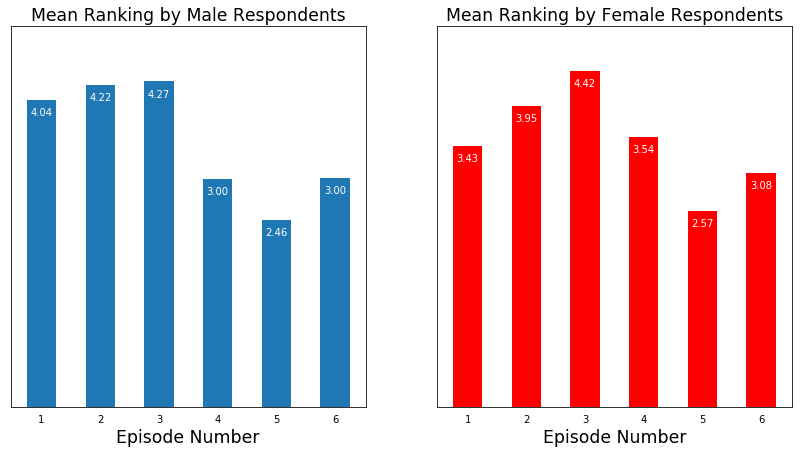

In [23]:
# Plot the mean movie ranking for each gender

build_two_bar_charts(ranking_males, 
                     ranking_females, 
                     'Mean Ranking by Male Respondents', 
                     'Mean Ranking by Female Respondents', 
                     'ranking', 
                     None,    # color_1 = None to select the default light blue color
                     'red', 
                     None)   # max_views = None since it is a ranking chart, not a 'total number of viewers' one

The first three episodes were given relatively similar ratings by males, while females liked the first episode much more than the third one, with the rating of the second movie being in the middle between the first and the third episodes.

As for the second half of the saga, there is nothing to point out except the fact that the fourth episode is given significantly higher rating by men (3.0) compared to women (3.54).

Now we will find total number of male and female viewers for each episode.

In [24]:
# Find the total male audience of each episode

male_viewers = males.iloc[:, 3:9].sum(axis = 0)
male_viewers

seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64

In [25]:
# Find the total female audience of each episode

female_viewers = females.iloc[:, 3:9].sum(axis = 0)
female_viewers

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64

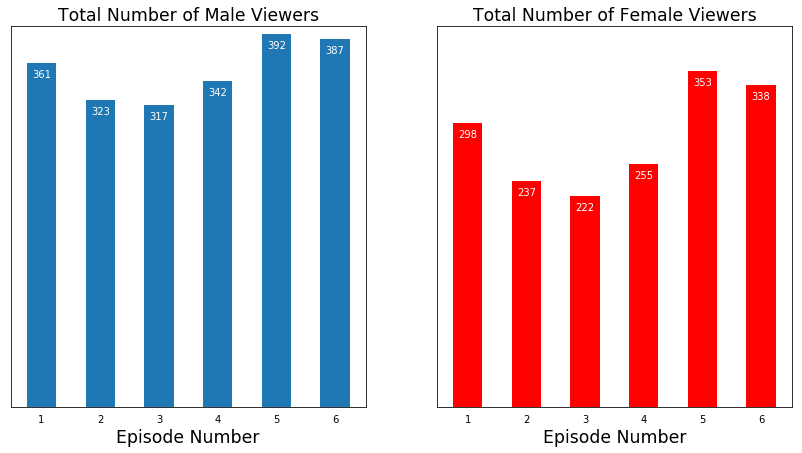

In [26]:
build_two_bar_charts(male_viewers, 
                     female_viewers, 
                     'Total Number of Male Viewers', 
                     'Total Number of Female Viewers', 
                     'number', 
                     None,     # color_1 = None to select the default light blue color
                     'red', 
                     400)

The male audience for each episode is larger than the female audience. The difference between the number of male viewers and the number of female viewers varies from 40 to 95. 

It is also interesting that the difference for the last two episodes is not that significant (39 and 49) as it is for the other episodes (83 on average). 

Now we will split our data based on respondents' educational background.

In [27]:
# Explore the values in the column

star_wars['Education'].value_counts(dropna = False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
NaN                                 150
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

As we can see, this column is non-binary. However, to avoid constructing multiple bar charts, and, more importantly, comparing all of them afterwards, we can split this data into two groups:
- High school degree or lower level of education
- College degree or higher level of education

To do this, we will create a new column that would indicate the respondent's level of education in terms of two groups above.

In [28]:
# Create a function that would convert the original values to one of the above-mentioned groups

def high_school(val):
    if pd.isnull(val):      # To keep the NaN values
        return np.nan       # as they are
    elif 'school' in val:
        return 'High school or lower'
    else:                                         
        return 'College degree or higher'
    
# Apply the function and create the new column with a new group of values

star_wars['edu_level'] = star_wars['Education'].apply(high_school)
star_wars['edu_level'].value_counts(dropna = False)   # dropna = False to check for NaN values

College degree or higher    924
NaN                         150
High school or lower        112
Name: edu_level, dtype: int64

In [29]:
# Select the respondents with higher level of education

college = star_wars.loc[star_wars['edu_level'] == 'College degree or higher', :]
college.shape

(924, 39)

In [30]:
# Select the respondents with lower level of education

school = star_wars.loc[star_wars['edu_level'] == 'High school or lower', :]
school.shape

(112, 39)

In [31]:
# Find the mean ranking for each episode among respondents with higher level of education

college_ranks = college.iloc[:, 9:15].mean(axis = 0)
college_ranks

ranking_1    3.731444
ranking_2    4.132075
ranking_3    4.371120
ranking_4    3.273585
ranking_5    2.475741
ranking_6    3.010782
dtype: float64

In [32]:
# Find the mean ranking for each episode among respondents with lower level of education

school_ranks = school.iloc[:, 9:15].mean(axis = 0)
school_ranks

ranking_1    3.851351
ranking_2    3.810811
ranking_3    4.108108
ranking_4    3.189189
ranking_5    2.797297
ranking_6    3.243243
dtype: float64

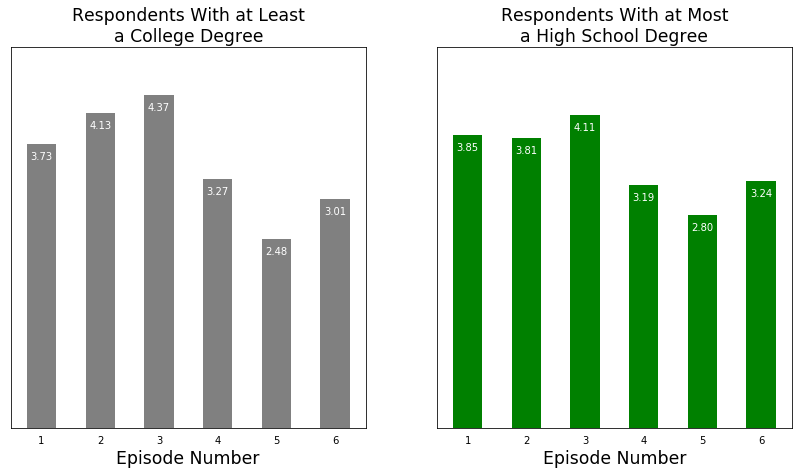

In [33]:
# Plot the results

build_two_bar_charts(college_ranks, 
                     school_ranks, 
                     'Respondents With at Least\na College Degree', 
                     'Respondents With at Most\na High School Degree', 
                     'ranking', 
                     'grey', 
                     'green', 
                     None)   # max_views = None since it is a ranking chart, not a 'total number of viewers' one 

It is very hard to see any patterns there. The only interesting point is that respondents with at most a high school degree liked the second and the third episode more, while those with higher level of education gave better ratings to the fifth and the sixth episodes.

In [34]:
# Find the total number of viewers with higher level of education for each episode

college_views = college.iloc[:, 3:9].sum(axis = 0)
college_views

seen_1    596
seen_2    505
seen_3    485
seen_4    538
seen_5    677
seen_6    658
dtype: int64

In [35]:
# Find the total number of viewers with lower level of education for each episode

school_views = school.iloc[:, 3:9].sum(axis = 0)
school_views

seen_1    60
seen_2    51
seen_3    51
seen_4    56
seen_5    64
seen_6    63
dtype: int64

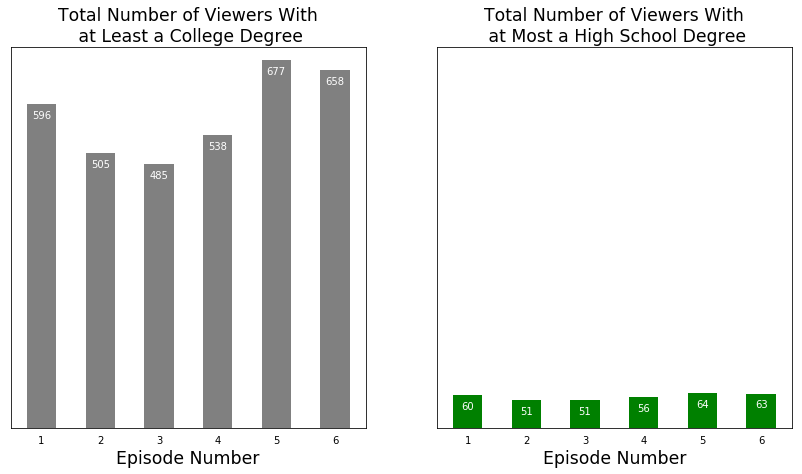

In [36]:
build_two_bar_charts(college_views, 
                     school_views, 
                     'Total Number of Viewers With\n at Least a College Degree', 
                     'Total Number of Viewers With\n at Most a High School Degree', 
                     'number', 
                     'grey', 
                     'green', 
                     700)

The number of viewers with at most a high school degree is significantly lower than the number of viewers with higher level of education. Nonetheless, the same pattern is present for both categories: episode 5 is the most viewed movie, while episodes 2 and 3 are the least viewed ones.

The next category that we will split the data on is whether the respondents think that Han shot first or Greedo shot first.

In [37]:
# Explore the values in the column

star_wars['Which character shot first?'].value_counts(dropna = False)

NaN                                 358
Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64

In [38]:
# Select respondents who believe that Han shot first

han = star_wars.loc[star_wars['Which character shot first?'] == 'Han', :]
han.shape

(325, 39)

In [39]:
# Select respondents who believe that Greedo shot first

greedo = star_wars.loc[star_wars['Which character shot first?'] == 'Greedo', :]
greedo.shape

(197, 39)

In [40]:
# Find the mean ranking for each episode among respondents who believe that Han shot first

han_ranks = han.iloc[:, 9:15].mean(axis = 0)
han_ranks

ranking_1    4.295385
ranking_2    4.298462
ranking_3    4.385802
ranking_4    2.769231
ranking_5    2.332308
ranking_6    2.913846
dtype: float64

In [41]:
# Find the mean ranking for each episode among respondents who believe that Greedo shot first

greedo_ranks = greedo.iloc[:, 9:15].mean(axis = 0)
greedo_ranks

ranking_1    3.857868
ranking_2    4.238579
ranking_3    4.426396
ranking_4    3.101523
ranking_5    2.370558
ranking_6    3.005076
dtype: float64

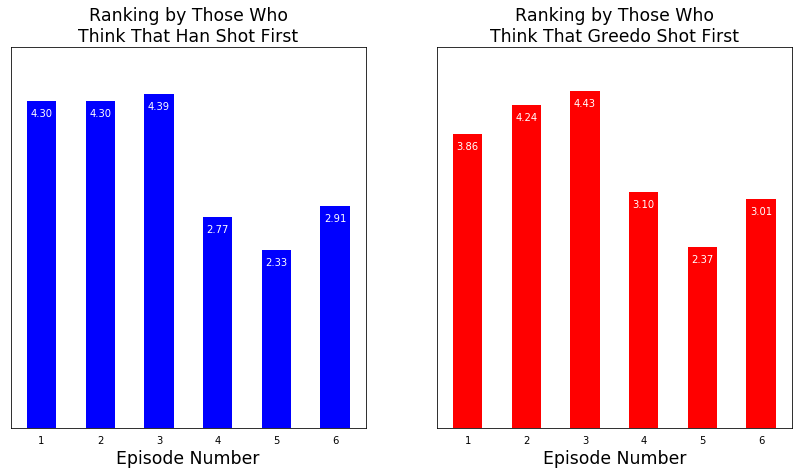

In [42]:
# Plot the results

build_two_bar_charts(han_ranks,
                     greedo_ranks, 
                     'Ranking by Those Who\nThink That Han Shot First', 
                     'Ranking by Those Who\nThink That Greedo Shot First', 
                     'ranking', 
                     'blue', 
                     'red', 
                     None)   # max_views = None since it is a ranking chart, not a 'total number of viewers' one 

The pattern remains, with the second half of the saga being much more liked than the first one for both groups of respondents. However, those who think that Han shot first ranked each episode of the second half of the trilogy higher. Episode 4, where the incident of shooting took place, has the most significant difference in ranks between the two groups - Han repondents ranked this episode higher. 

As for the first part of the saga, episodes 1 and 2 are ranked higher by Greedo respondents, while episode 3 is given slightly higher ranks by Han respondents. 

# Respondents' attitude to characters of the saga

Our aim for this section is to find out:

- The most liked character
- The most disliked character
- The most controversial character (split between likes and dislikes)

However, we should first clean the columns.

In [43]:
# There are 14 columns each of which contains respondents' attitude to one character

star_wars.iloc[:10, 15:29]

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably
6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably
7,Very favorably,Very favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat unfavorably,Somewhat favorably,Very favorably
8,Very favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Very unfavorably,Somewhat unfavorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat unfavorably,Very favorably
9,Very favorably,Somewhat unfavorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Very unfavorably,Somewhat unfavorably,Somewhat favorably
10,Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very favorably,Very favorably,Somewhat unfavorably,Very favorably,Somewhat unfavorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Somewhat unfavorably,Very favorably


As we can see, the columns should be renamed. The name of each column will be the name of the character.

In [44]:
# Build the dictionary for renaming columns

characters = [
    'Han Solo', 
    'Luke Skywalker', 
    'Princess Leia Organa', 
    'Anakin Skywalker', 
    'Obi Wan Kenobi', 
    'Emperor Palpatine', 
    'Darth Vader', 
    'Lando Calrissian', 
    'Boba Fett', 
    'C-3P0', 
    'R2 D2', 
    'Jar Jar Binks', 
    'Padme Amidala', 
    'Yoda'
]

rename_dict = {}
for i in range(14):
    rename_dict[star_wars.columns[i+15]] = characters[i]
    
rename_dict

{'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
 'Unnamed: 16': 'Luke Skywalker',
 'Unnamed: 17': 'Princess Leia Organa',
 'Unnamed: 18': 'Anakin Skywalker',
 'Unnamed: 19': 'Obi Wan Kenobi',
 'Unnamed: 20': 'Emperor Palpatine',
 'Unnamed: 21': 'Darth Vader',
 'Unnamed: 22': 'Lando Calrissian',
 'Unnamed: 23': 'Boba Fett',
 'Unnamed: 24': 'C-3P0',
 'Unnamed: 25': 'R2 D2',
 'Unnamed: 26': 'Jar Jar Binks',
 'Unnamed: 27': 'Padme Amidala',
 'Unnamed: 28': 'Yoda'}

In [45]:
# Rename the columns

star_wars.rename(rename_dict, axis = 1, inplace = True)
star_wars.iloc[:10, 15:29]

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably
6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably
7,Very favorably,Very favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat unfavorably,Somewhat favorably,Very favorably
8,Very favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Very unfavorably,Somewhat unfavorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat unfavorably,Very favorably
9,Very favorably,Somewhat unfavorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Very unfavorably,Somewhat unfavorably,Somewhat favorably
10,Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very favorably,Very favorably,Somewhat unfavorably,Very favorably,Somewhat unfavorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Somewhat unfavorably,Very favorably


In [46]:
# Explore possible values in these columns

star_wars['Han Solo'].value_counts(dropna = False)

Very favorably                                 610
NaN                                            357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han Solo, dtype: int64

In [47]:
# Build a function that converts respondents' attitude to a Star Wars character to a numeric value on a scale 1 to 5

def chars_ranks(val):
    if pd.isnull(val) or val == 'Unfamiliar (N/A)':
        return np.nan
    elif val == 'Very favorably':
        return 5
    elif val == 'Somewhat favorably':
        return 4
    elif val == 'Neither favorably nor unfavorably (neutral)':
        return 3
    elif val == 'Somewhat unfavorably':
        return 2
    elif val == 'Very unfavorably':
        return 1

In [48]:
# Apply the function to all 'attitude columns'

cols = star_wars.columns[15:29]
for c in cols:
    star_wars[c] = star_wars[c].apply(chars_ranks)

star_wars.iloc[:10, 15:29]

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,5.0,5.0,5.0,5.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,2.0,5.0,5.0,5.0,5.0,5.0
5,5.0,4.0,4.0,2.0,5.0,1.0,4.0,3.0,5.0,4.0,4.0,1.0,4.0,4.0
6,5.0,5.0,5.0,5.0,5.0,3.0,5.0,3.0,4.0,4.0,4.0,4.0,3.0,5.0
7,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,2.0,4.0,5.0
8,5.0,4.0,5.0,3.0,5.0,1.0,2.0,3.0,4.0,4.0,4.0,1.0,2.0,5.0
9,5.0,2.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,3.0,4.0,1.0,2.0,4.0
10,3.0,5.0,5.0,5.0,5.0,2.0,5.0,2.0,2.0,5.0,5.0,5.0,2.0,5.0


Now that we have cleaned the columns, we can start our analysis. We will start with finding the most liked and the most disliked characters. For this, we will find the mean ranking for each character and find the one with the highest ranking, and the one with the lowest ranking. 

In [49]:
# Construct a dictionary that contains mean respondents' attitude to each character

ranking_chars = {}
for c in cols:
    ranking_chars[c] = star_wars[c].mean()

ranking_chars

{'Han Solo': 4.671990171990172,
 'Luke Skywalker': 4.580606060606061,
 'Princess Leia Organa': 4.555285540704738,
 'Anakin Skywalker': 3.775616083009079,
 'Obi Wan Kenobi': 4.632425742574258,
 'Emperor Palpatine': 3.0714285714285716,
 'Darth Vader': 3.4791666666666665,
 'Lando Calrissian': 3.636904761904762,
 'Boba Fett': 3.3573529411764707,
 'C-3P0': 4.403940886699507,
 'R2 D2': 4.569512195121951,
 'Jar Jar Binks': 2.7808988764044944,
 'Padme Amidala': 3.6046153846153848,
 'Yoda': 4.629901960784314}

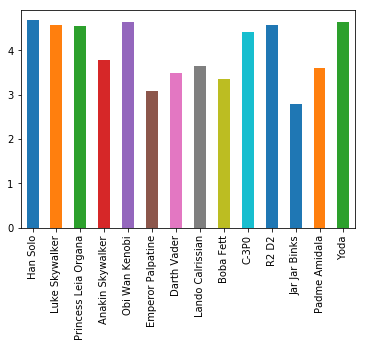

In [50]:
# Plot the results

ranking_ser = pd.Series(ranking_chars)
ranking_ser.plot(kind = 'bar')

As we can see, Han Solo was the most liked character among the respondents, while Jar Jar Binks was the least liked character. The latter is quite surprising, since Jar Jar Binks is not (explicitly) a negative character.

Next, we should find the most controversial character. For this, we will count the amount of 'likes' (scores 4 and 5) and 'dislikes' (scores 1 and 2) for each character, and find the character which has the lowest difference between the two.

In [51]:
star_wars['Han Solo'].value_counts()

5.0    610
4.0    151
3.0     44
2.0      8
1.0      1
Name: Han Solo, dtype: int64

In [56]:
# Find the differnce between the number of likes and the number of dislikes for each character

controversial = {}
for c in cols:
    num_likes = star_wars[c].value_counts().iloc[0] + star_wars[c].value_counts().iloc[1]   # Add up the number of 'Very favorably' and 'Somewhat favorably' answers
    num_dislikes = star_wars[c].value_counts().iloc[3] + star_wars[c].value_counts().iloc[4]   # Add up the number of 'Very unfavorably' and 'Somewhat unfavorably' answers
    controversity_score = abs(num_likes - num_dislikes)   # abs() to avoid having negative values
    controversial[c] = controversity_score
    
controversial

{'Han Solo': 752,
 'Luke Skywalker': 755,
 'Princess Leia Organa': 739,
 'Anakin Skywalker': 392,
 'Obi Wan Kenobi': 735,
 'Emperor Palpatine': 178,
 'Darth Vader': 295,
 'Lando Calrissian': 388,
 'Boba Fett': 260,
 'C-3P0': 673,
 'R2 D2': 731,
 'Jar Jar Binks': 154,
 'Padme Amidala': 298,
 'Yoda': 733}

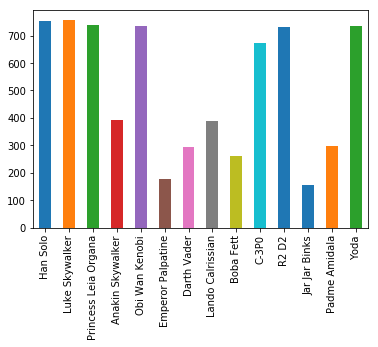

In [53]:
# Plot the results

controversial_df = pd.Series(controversial)
controversial_df.plot(kind = 'bar')

Jar Jar Binks is the most controversial character of the saga, with Emperor Palpatine getting a close second place.

# Conclusion
In this project, we have analyzed the *Star Wars* survey data. We have had a variety of questions to answer, so there are several things to point out:

- The fifth episode was the most viewed **and** the most liked movie of the saga;
- Males tend to watch *Star Wars* more than females;
- Those who think that Han shot first like the fourth episode more than those who believe that Greedo was the one to start the gunfire;
- Han Solo was the most liked character of the trilogy, while Jar Jar Binks turned out to be the most disliked and the most controversial character of the saga.